<p style="font-family: Arial; font-size:3.75em;color:Blue; font-style:bold"><br>
Airbnb in NY </p><br>


A‌i‌r‌b‌n‌b‌,‌ ‌I‌n‌c‌.‌ is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.[4] The company is based in San Francisco, California, United States.

The company was conceived after its founders put an air mattress in their living room, effectively turning their apartment into a bed and breakfast, in order to offset the high cost of rent in San Francisco; Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopandas import GeoDataFrame 
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib.colors import ListedColormap
%matplotlib inline


<p style="font-family: Arial; font-size:2.75em;color:red; font-style:bold"><br>
1. Data preprocessing </p><br>

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

4. Is there any noticeable difference of traffic among different areas and what could be the      reason for it?

1. what can we learn about different hosts and areas?

3. Which hosts are the busiest and why?

5. Which are the famous neighborhoods and neighborhood groups among the listings?
6. What is the price range of the listings?
7. What are the mst common words used in the description?
8. Which room types are usually busy ? Is the trend different in different neighborhoods?
9. How are the reviews distributed?


## Data 

room_id: A unique number identifying an Airbnb listing.

host_id: A unique number identifying an Airbnb host.

neighborhood: A subregion of the city or search area for which the survey is carried out. For some cities there is no neighbourhood information.

room_type: One of “Entire home/apt”, “Private room”, or “Shared room”.

price: The price (in $US) for a night stay. In early surveys, there may be some values that were recorded by month.

minimum_nights: The minimum stay for a visit, as posted by the host.

number_of_reviews: The number of reviews that a listing has received. Airbnb has said that 70% of visits end up with a review, so the number of reviews can be used to estimate the number of visits. Note that such an estimate will not be reliable for an individual listing (especially as reviews occasionally vanish from the site), but over a city as a whole it should be a useful metric of traffic.

reviews_per_month: The number of reviews that a listing has received per month.

host_listings_count: The number of listingsfora particular host.

availability_365: The number of days for which a particular host is available in a year.

<p style="font-family: Arial; font-size:2.75em;color:red; font-style:bold"><br>
2. Data Wrangling  </p><br>

## Get the Data

In [2]:
Airbnb = pd.read_csv("AB_NYC_2019.csv")


In [3]:
Airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
Airbnb.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [5]:
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

## Missing value 

In [6]:
Airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Many reviews are missing. There are 10052 missing values in last_review and reviews_per_month out of 48895. Since id and host_name are not the important variables, so I decide to delete two variables. Also, last_review variable is deleted because it has many null values in it and the number of reviews is more significant to find out information.

In [7]:
missing = pd.isnull(Airbnb['reviews_per_month'])
Airbnb[missing]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
193,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,Manhattan,Upper East Side,40.77333,-73.95199,Private room,130,14,0,NaN,NaN,2,0
204,54466,Beautiful Uptown Manhattan apartmnt,253385,Douglas,Manhattan,Harlem,40.80234,-73.95603,Private room,200,30,0,NaN,NaN,1,365
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaN,NaN,7,349
265,63913,"HOSTING YOUR SUNNY, SPACIOUS NYC ROOM",312288,Paula,Manhattan,Inwood,40.86648,-73.92630,Private room,75,7,0,NaN,NaN,2,323
267,64015,Prime East Village 1 Bedroom,146944,David,Manhattan,East Village,40.72807,-73.98594,Entire home/apt,200,3,0,NaN,NaN,1,0


In [8]:
missing2 = pd.isnull(Airbnb['last_review'])
Airbnb[missing2]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
193,51438,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Jessica,Manhattan,Upper East Side,40.77333,-73.95199,Private room,130,14,0,NaN,NaN,2,0
204,54466,Beautiful Uptown Manhattan apartmnt,253385,Douglas,Manhattan,Harlem,40.80234,-73.95603,Private room,200,30,0,NaN,NaN,1,365
260,63588,LL3,295128,Carol Gloria,Bronx,Clason Point,40.81309,-73.85514,Private room,90,2,0,NaN,NaN,7,349
265,63913,"HOSTING YOUR SUNNY, SPACIOUS NYC ROOM",312288,Paula,Manhattan,Inwood,40.86648,-73.92630,Private room,75,7,0,NaN,NaN,2,323
267,64015,Prime East Village 1 Bedroom,146944,David,Manhattan,East Village,40.72807,-73.98594,Entire home/apt,200,3,0,NaN,NaN,1,0


In [9]:
Airbnb.drop(['id','host_name','last_review'],axis=1,inplace=True)

<p style="font-family: Arial; font-size:2.75em;color:red; font-style:bold"><br>
3. Data exploration </p><br>


## Categorical variable 

In [10]:
room_dummies = Airbnb['room_type'].str.get_dummies()
Airbnb = Airbnb.join(room_dummies)

In [11]:
group_dummies = Airbnb['neighbourhood_group'].str.get_dummies()
Airbnb = Airbnb.join(group_dummies)

In [12]:
Airbnb.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Entire home/apt',
       'Private room', 'Shared room', 'Bronx', 'Brooklyn', 'Manhattan',
       'Queens', 'Staten Island'],
      dtype='object')

## Correlation 

In [13]:
Corr = Airbnb[['price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Entire home/apt', 'Private room', 'Shared room',
       'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']].corr()
Corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
price,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829,0.255857,-0.240246,-0.053613,-0.041030,-0.098603,0.163976,-0.080205,-0.013840
minimum_nights,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303,0.074900,-0.073837,-0.004218,-0.018186,-0.039658,0.067362,-0.032629,-0.009400
number_of_reviews,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028,-0.010087,0.017253,-0.023355,0.009258,0.017414,-0.045820,0.035967,0.015088
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791,-0.041564,0.039125,0.008747,0.041997,-0.045902,-0.052057,0.123484,0.026827
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701,0.112193,-0.108945,-0.011737,-0.022511,-0.123234,0.152842,-0.033881,-0.012838
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000,-0.006804,-0.010986,0.058294,0.060806,-0.079671,-0.005434,0.087113,0.057885
Entire home/apt,0.255857,0.074900,-0.010087,-0.041564,0.112193,-0.006804,1.000000,-0.953470,-0.162144,-0.052092,-0.073905,0.160082,-0.108505,-0.008391
Private room,-0.240246,-0.073837,0.017253,0.039125,-0.108945,-0.010986,-0.953470,1.000000,-0.142899,0.042765,0.079464,-0.157762,0.100676,0.008345
Shared room,-0.053613,-0.004218,-0.023355,0.008747,-0.011737,0.058294,-0.162144,-0.142899,1.000000,0.031041,-0.017467,-0.009169,0.026693,0.000233
Bronx,-0.041030,-0.018186,0.009258,0.041997,-0.022511,0.060806,-0.052092,0.042765,0.031041,1.000000,-0.126239,-0.134730,-0.054693,-0.013245


Text(0.5, 1.0, 'Airbnb.corr()')

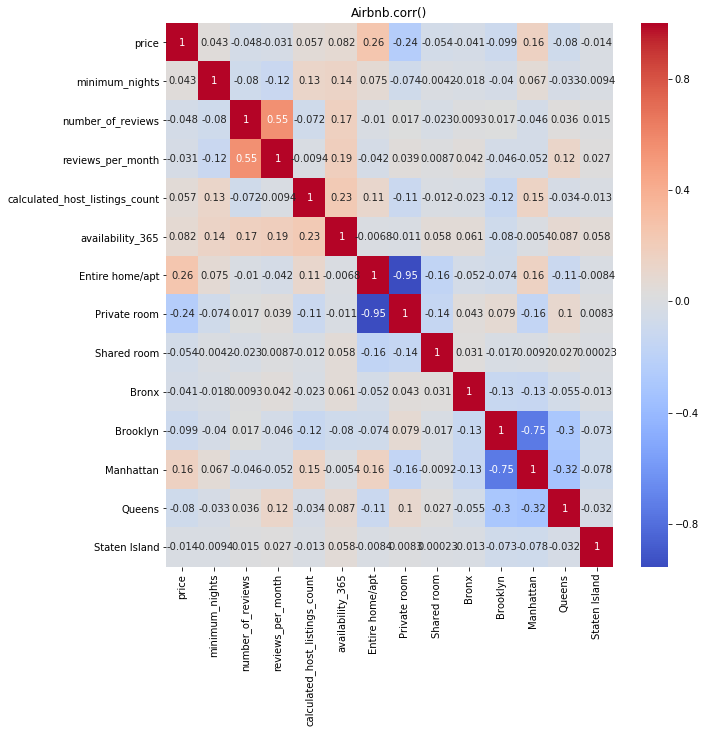

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(Corr,cmap='coolwarm',annot=True)
plt.title('Airbnb.corr()')

## Neighbourhood

How many airbnb are in different areas? 

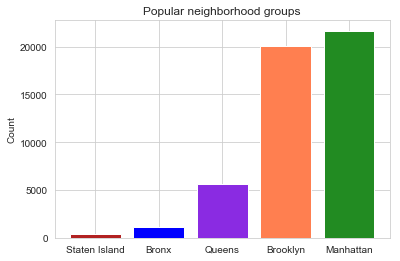

In [15]:
sns.set_style('whitegrid')
count_areas = Airbnb['neighbourhood_group'].value_counts().sort_values().reset_index(inplace =False)
group_count = plt.bar(Airbnb['neighbourhood_group'].value_counts().sort_values().index, Airbnb['neighbourhood_group'].value_counts().sort_values())
group_count[0].set_facecolor('firebrick')
group_count[1].set_facecolor('b')
group_count[2].set_facecolor('blueviolet')
group_count[3].set_facecolor('coral')
group_count[4].set_facecolor('forestgreen')
plt.title('Popular neighborhood groups')

plt.ylabel('Count')
plt.show()


Most of airbnb houses are gathered in Brookly and Manhattan. 

## Price differences in areas
- Manhattan area has the most expesnsive rental fee on airbnb. The mean of house rental fee reaches around $ 200. Leading on top of Brooklyn, Staten Island,Queens,and Bronk 

In [16]:
price_arange= Airbnb[['neighbourhood_group','price']].groupby('neighbourhood_group').mean().sort_values(by='price')

price_arange

,price
neighbourhood_group,
Bronx,87.496792
Queens,99.517649
Staten Island,114.812332
Brooklyn,124.383207
Manhattan,196.875814


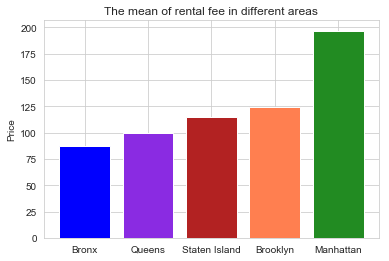

In [17]:

group_price = plt.bar(price_arange.index, price_arange['price'])

list1=['b','blueviolet','firebrick','coral','forestgreen']
for i in range(len(list1)): 
    group_price[i]. set_facecolor(list1[i])

plt.title('The mean of rental fee in different areas')
plt.ylabel('Price')
plt.show()


In [18]:
Limit_500 = Airbnb.loc[Airbnb.price<500,['name', 'host_id', 'neighbourhood_group', 
        'neighbourhood', 'latitude','longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365', 'geometry']]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


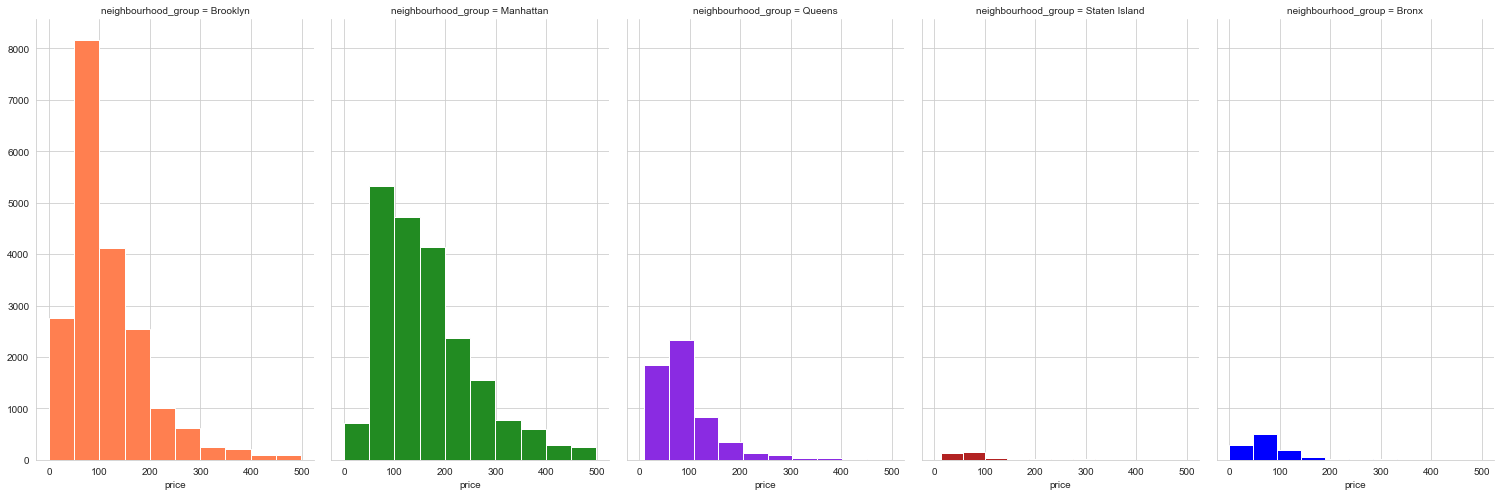

In [19]:
d = {'color': ['coral','forestgreen','blueviolet','firebrick','b']}
g = sns.FacetGrid(data =Limit_500, col='neighbourhood_group' ,
                  hue='neighbourhood_group',hue_kws=d, height=7, aspect=0.6)
g = g.map(plt.hist, 'price')



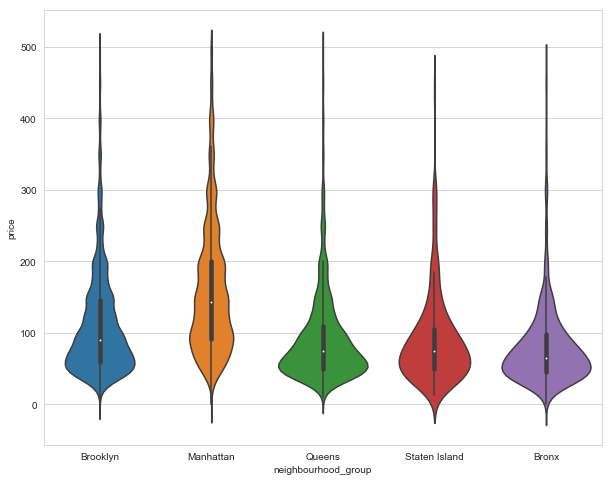

In [20]:
plt.figure(figsize=(10,8))
sns.violinplot(x=Limit_500['neighbourhood_group'], y=Limit_500['price'])

In [21]:
sub_1=Airbnb.loc[Airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
sub_2=Airbnb.loc[Airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
sub_3=Airbnb.loc[Airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
sub_4=Airbnb.loc[Airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
sub_5=Airbnb.loc[Airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]

#putting all the prices' dfs in the list
price_by_group=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

price_list=[] 
area_group=['Brooklyn','Manhattan','Queens','Staten Island','Bronx']

for i in price_by_group :
    x = i.describe()
    x.iloc[3:]
    x.reset_index(inplace=True)
    x.rename(columns={'index':'Stats'}, inplace=True)
    price_list.append(x)
    
price_list[0].rename(columns={'price':area_group[0]}, inplace=True)
price_list[1].rename(columns={'price':area_group[1]}, inplace=True)
price_list[2].rename(columns={'price':area_group[2]}, inplace=True)
price_list[3].rename(columns={'price':area_group[3]}, inplace=True)
price_list[4].rename(columns={'price':area_group[4]}, inplace=True)
    
price_list
stat_df=[df.set_index('Stats') for df in price_list]
stat_df[0].join(stat_df[1:])
                      

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
count,20104.000000,21661.000000,5666.000000,373.000000,1091.000000
mean,124.383207,196.875814,99.517649,114.812332,87.496792
std,186.873538,291.383183,167.102155,277.620403,106.709349
min,0.000000,0.000000,10.000000,13.000000,0.000000
25%,60.000000,95.000000,50.000000,50.000000,45.000000
50%,90.000000,150.000000,75.000000,75.000000,65.000000
75%,150.000000,220.000000,110.000000,110.000000,99.000000
max,10000.000000,10000.000000,10000.000000,5000.000000,2500.000000


the site's highest growth of tourists for that week didn't coming from Manhattan, or even Brooklyn - It came from Queens. But still Manhattan and Brooklyn are the busier areas than others.

We can see the range of price in areas.

##  Neighbourhood

This showing that the top 20 neighbourhoods which have the rental houses on airbnb among 221 neighbours in New york. 

In [22]:
Airbnb['neighbourhood'].value_counts()

Williamsburg                  3920
Bedford-Stuyvesant            3714
Harlem                        2658
Bushwick                      2465
Upper West Side               1971
Hell's Kitchen                1958
East Village                  1853
Upper East Side               1798
Crown Heights                 1564
Midtown                       1545
East Harlem                   1117
Greenpoint                    1115
Chelsea                       1113
Lower East Side                911
Astoria                        900
Washington Heights             899
West Village                   768
Financial District             744
Flatbush                       621
Clinton Hill                   572
Long Island City               537
Prospect-Lefferts Gardens      535
Park Slope                     506
East Flatbush                  500
Fort Greene                    489
Murray Hill                    485
Kips Bay                       470
Flushing                       426
Ridgewood           

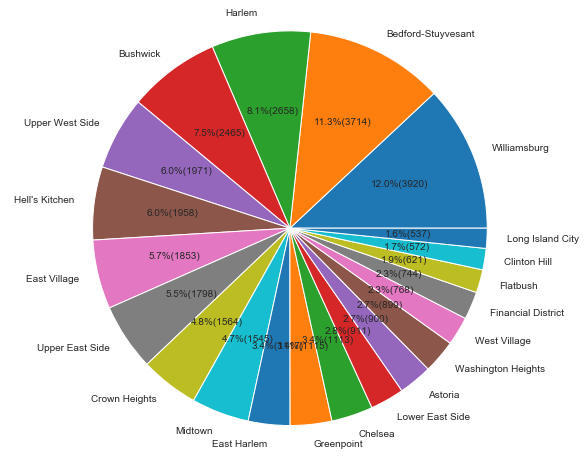

In [23]:
top20=Airbnb['neighbourhood'].value_counts()[:21]
labels = top20.index
values  = list(top20) 


def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(values, labels=labels, autopct=make_autopct(values))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [24]:
group_neigh = Airbnb[['neighbourhood_group','neighbourhood','price','longitude','latitude']].groupby(['neighbourhood_group','neighbourhood']).mean()
group_neigh.reset_index(inplace=True)
df2 =group_neigh.groupby('neighbourhood_group').apply(lambda x: x.sort_values(["price"], ascending = False)).reset_index(drop=True)
top10_eacharea = df2.groupby('neighbourhood_group').head(10)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


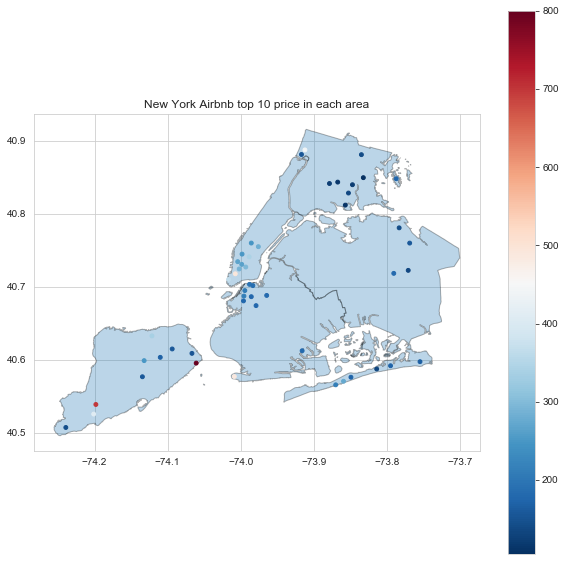

In [25]:
crs = {'init' :'epsg:4326'}
top10_eacharea['geometry'] = top10_eacharea.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
gdf = gpd.GeoDataFrame(top10_eacharea, crs=crs, geometry=top10_eacharea['geometry'])


df = gpd.read_file(gpd.datasets.get_path('nybb'))
df = df.to_crs(epsg=4326)

fig, ax= plt.subplots(figsize=(10,10))
ax.set_title("New York Airbnb top 10 price in each area")
df.plot(ax=ax,alpha=0.3,edgecolor='black')
gdf.plot(column='price',ax=ax,legend=True,cmap="RdBu_r",markersize=15,alpha=1)


## Number of reviews in areas

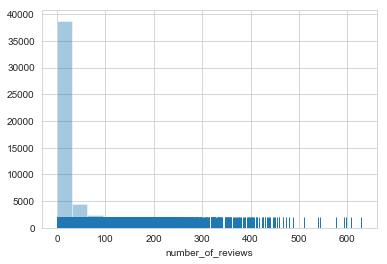

In [26]:
sns.distplot(Airbnb['number_of_reviews'], bins=20, kde=False, rug=True);


In [27]:
reviews_areas = Airbnb[['neighbourhood_group','number_of_reviews']].groupby('neighbourhood_group').mean().sort_values(by='number_of_reviews')
reviews_areas

,number_of_reviews
neighbourhood_group,
Manhattan,20.985596
Brooklyn,24.202845
Bronx,26.004583
Queens,27.700318
Staten Island,30.941019


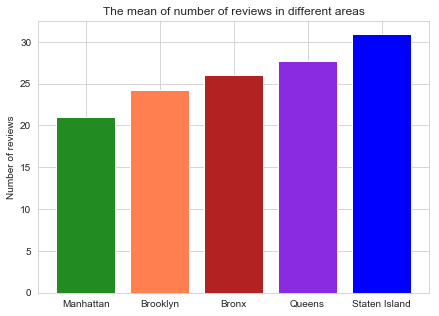

In [28]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(7,5))


reviews_areas = plt.bar(reviews_areas.index, reviews_areas['number_of_reviews'])

list1=['forestgreen','coral','firebrick','blueviolet','b']
for i in range(len(list1)): 
    reviews_areas[i]. set_facecolor(list1[i])

plt.title('The mean of number of reviews in different areas')
plt.ylabel('Number of reviews')
plt.show()



Let's see The number of reviews between Mahattan and Staten island.
The retan fee in Staten island is far lower than in Manhattan but the average reviews Airbnb hosting owners have got in Staten island is higher than in Manhattan. 
It seems that the more expensive the rental fee is the less reviews they get. 

## Availability

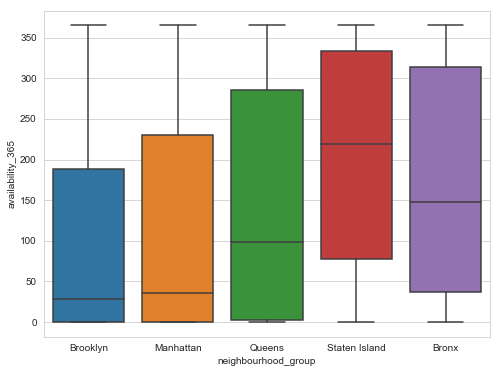

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='neighbourhood_group',y='availability_365',data= Airbnb)

The crowded and popular areas tend to have lower availability customers can use. Overall Brooklyn and Manhattan are the shorter available days customers make a reservations for.  

## Neighbourhood_group& Room type 

Which room types are usually busy ? Is the trend different in different neighborhoods?

In [30]:

Airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,...,6,365,0,1,0,0,1,0,0,0
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,...,2,355,1,0,0,0,0,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,...,1,365,0,1,0,0,0,1,0,0
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,...,1,194,1,0,0,0,1,0,0,0
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,...,1,0,1,0,0,0,0,1,0,0


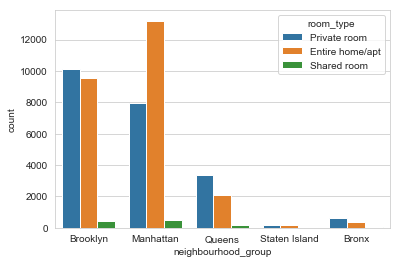

In [31]:
sns.countplot(x='neighbourhood_group',hue='room_type',data=Airbnb)

In Manhattan, there is more types of entire home or apartments than other types, private room and shared room. Airbnb host post the type of private rooms more than other types.

## host_id 

In [32]:
Airbnb['host_id'].nunique()

37457

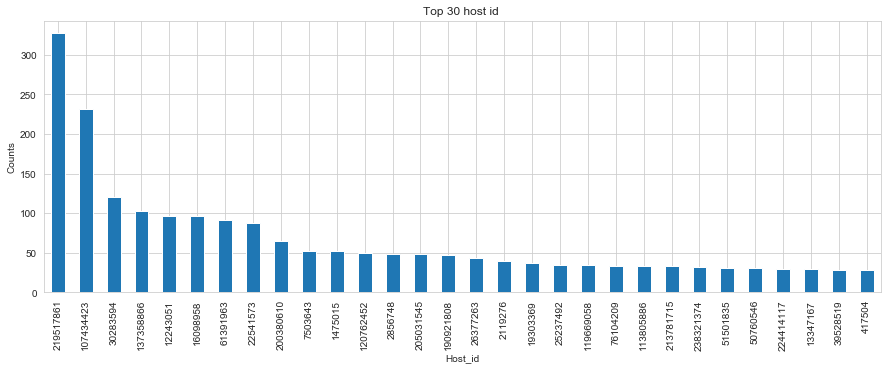

In [33]:
# mean of price and number of reviews by host_id
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

id_counts = Airbnb['host_id'].value_counts().head(30)
id_counts.plot(kind='bar')

ax.set_xlabel('Host_id')
ax.set_ylabel('Counts')
ax.set_title('Top 30 host id ')

plt.show()

counts = pd.DataFrame({'host_id':id_counts.index, 'counts':id_counts.values})
price_average = Airbnb[['host_id','price']].groupby('host_id',as_index=False).mean()
reviews_average = Airbnb[['host_id','number_of_reviews']].groupby('host_id',as_index=False).mean()
merge1 = pd.merge(counts, price_average, on='host_id', how='inner')
merge2 = pd.merge(merge1, reviews_average, on='host_id', how='inner')



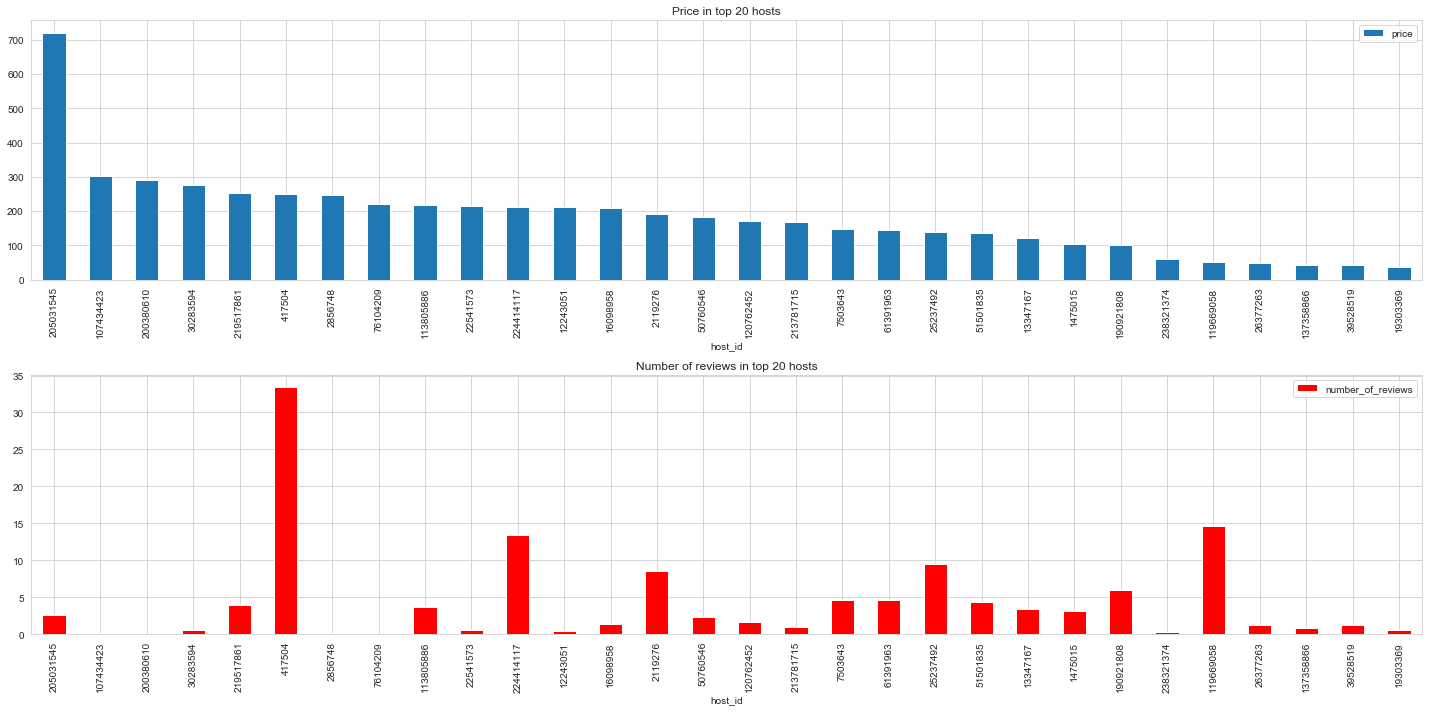

In [34]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,10))

merge2.sort_values(['price'],axis=0, ascending=False).plot(x='host_id',y='price',kind='bar', ax=ax1)
merge2.sort_values(['price'],axis=0, ascending=False).plot(x='host_id',y='number_of_reviews',kind='bar', ax=ax2, color='red')
ax1.set_title('Price in top 20 hosts')
ax2.set_title('Number of reviews in top 20 hosts')
fig.tight_layout()

## 'host_id'==219517861 Analysis

In [35]:
airfre = Airbnb[Airbnb['host_id']==219517861] # Manhattan

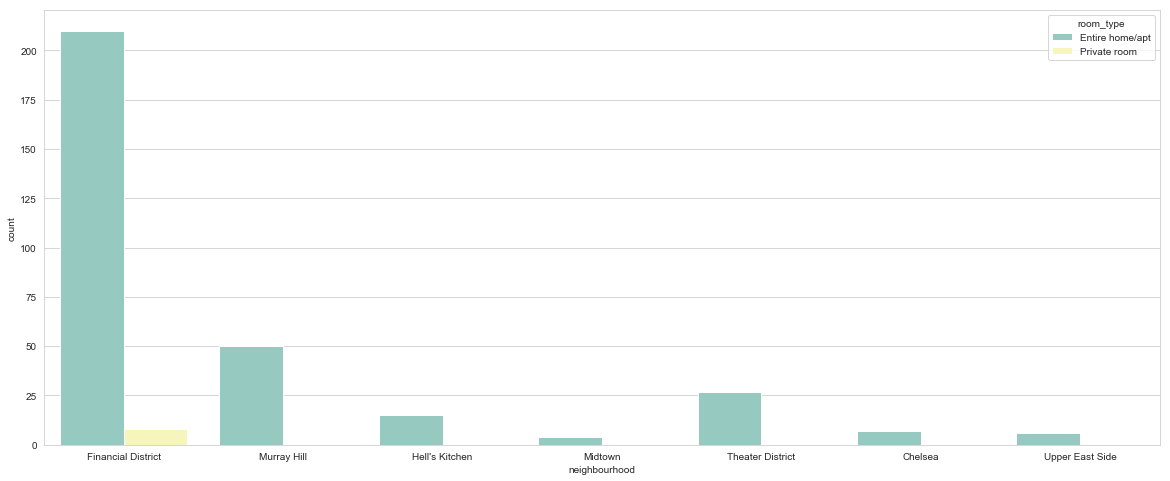

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(x='neighbourhood',hue='room_type',data=airfre,palette='Set3')

In [37]:
airfre.describe(include='all')

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
count,327,327.0,327,327,327.000000,327.000000,327,327.000000,327.000000,327.000000,...,327.0,327.000000,327.000000,327.000000,327.0,327.0,327.0,327.0,327.0,327.0
unique,311,NaN,1,7,NaN,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Sonder | The Biltmore | Stunning 1BR + Sofa Bed,NaN,Manhattan,Financial District,NaN,NaN,Entire home/apt,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,NaN,327,218,NaN,NaN,319,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,219517861.0,NaN,NaN,40.722502,-74.000577,NaN,253.195719,13.311927,3.917431,...,327.0,301.492355,0.975535,0.024465,0.0,0.0,0.0,1.0,0.0,0.0
std,NaN,0.0,NaN,NaN,0.022356,0.014629,NaN,119.586884,13.341915,4.281065,...,0.0,66.677544,0.154724,0.154724,0.0,0.0,0.0,0.0,0.0,0.0
min,NaN,219517861.0,NaN,NaN,40.705600,-74.012580,NaN,100.000000,2.000000,0.000000,...,327.0,37.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
25%,NaN,219517861.0,NaN,NaN,40.706550,-74.011115,NaN,188.500000,2.000000,0.000000,...,327.0,282.500000,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
50%,NaN,219517861.0,NaN,NaN,40.707610,-74.010230,NaN,228.000000,2.000000,2.000000,...,327.0,328.000000,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0
75%,NaN,219517861.0,NaN,NaN,40.747700,-73.986980,NaN,255.000000,29.000000,7.000000,...,327.0,341.500000,1.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0


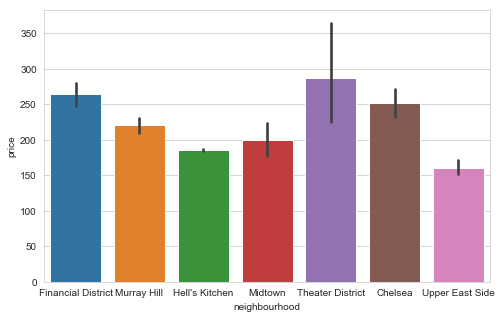

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='neighbourhood',y='price',data=airfre)

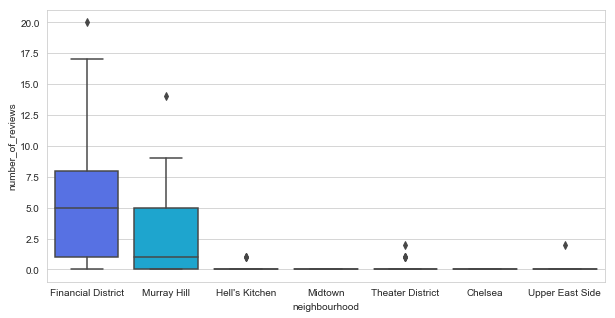

In [39]:
plt.figure(figsize=(10,5))
sns.boxplot(x='neighbourhood', y="number_of_reviews", data=airfre, palette='rainbow' )

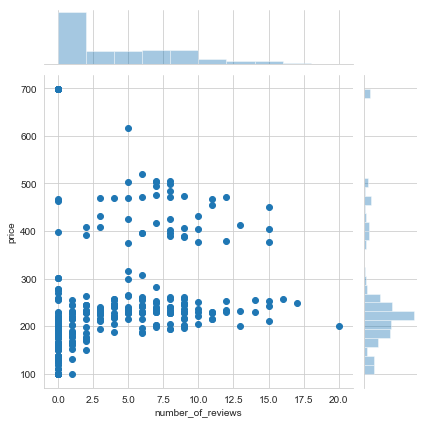

In [40]:
sns.jointplot(x='number_of_reviews',y='price',data=airfre)

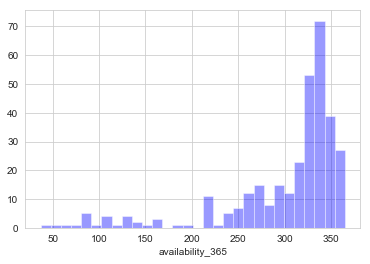

In [41]:
sns.distplot(airfre['availability_365'],kde=False,color='b',bins=30)


## Roomtype

8. Which room types are usually busy ? Is the trend different in different neighborhoods?


In [42]:
# roomtype price
Airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Text(0.5, 1.0, 'Counts of room_type')

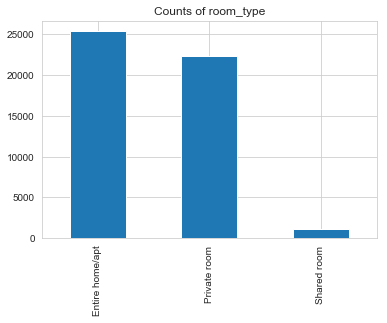

In [43]:
# roomtype count

Airbnb['room_type'].value_counts().plot(kind='bar')
plt.title("Counts of room_type")

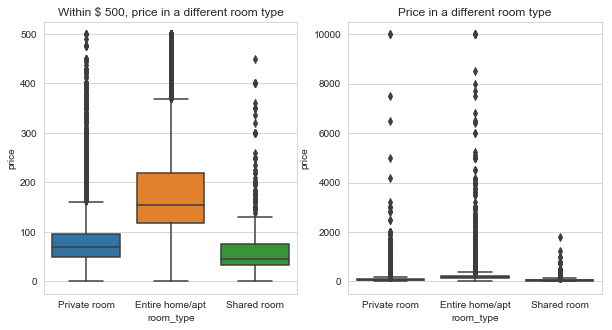

In [44]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x='room_type',y='price',data=Limit_500,ax=ax1)
sns.boxplot(x='room_type',y='price',data=Airbnb,ax=ax2)
ax1.set_title('Within $ 500, price in a different room type')
ax2.set_title('Price in a different room type')
plt.show()

In [45]:
# roomtype n of review 

In [46]:
df = Airbnb.groupby(['room_type','neighbourhood_group'])['number_of_reviews'].mean()
df =pd.DataFrame(df,columns=['number_of_reviews'])

df.reset_index(inplace=True)
df

,room_type,neighbourhood_group,number_of_reviews
0,Entire home/apt,Bronx,30.678100
1,Entire home/apt,Brooklyn,27.945183
2,Entire home/apt,Manhattan,17.815516
3,Entire home/apt,Queens,28.933206
4,Entire home/apt,Staten Island,33.278409
5,Private room,Bronx,25.018405
6,Private room,Brooklyn,21.086952
7,Private room,Manhattan,26.202706
8,Private room,Queens,27.746441
9,Private room,Staten Island,30.159574


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


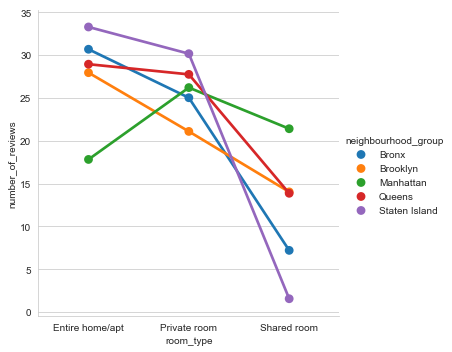

In [47]:
sns.factorplot(x='room_type',
               y='number_of_reviews',
               data=df,
               hue='neighbourhood_group',
               kind= 'point')


In [48]:
df = Airbnb.groupby('room_type')['number_of_reviews'].describe()
df = df.drop(['count','mean','std'],axis=1)
df = df.transpose()
pd.DataFrame(df, columns=['Entire home/apt','Private room','Shared room'])

,Entire home/apt,Private room,Shared room
min,0.0,0.0,0.00
25%,1.0,1.0,0.00
50%,5.0,5.0,4.00
75%,23.0,25.0,16.25
max,488.0,629.0,454.00


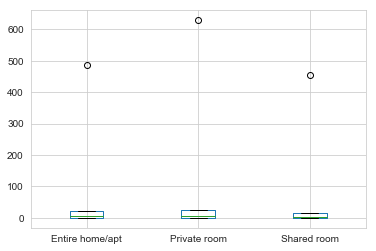

In [49]:
df.boxplot(column=['Entire home/apt','Private room','Shared room'])

## latitude	longitude

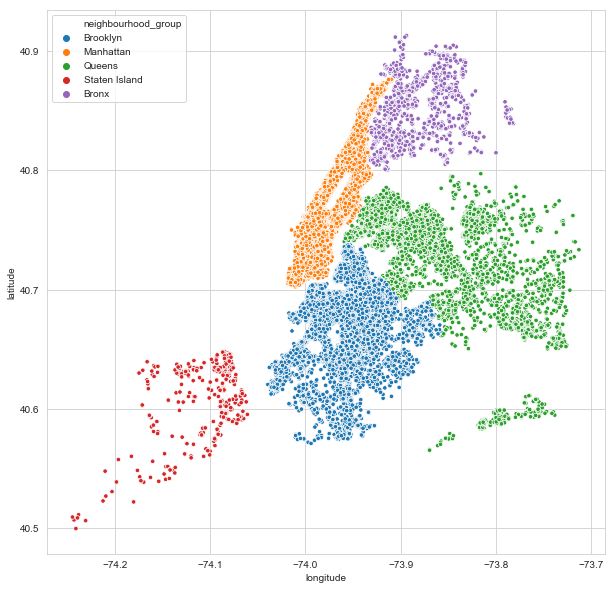

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=Airbnb)

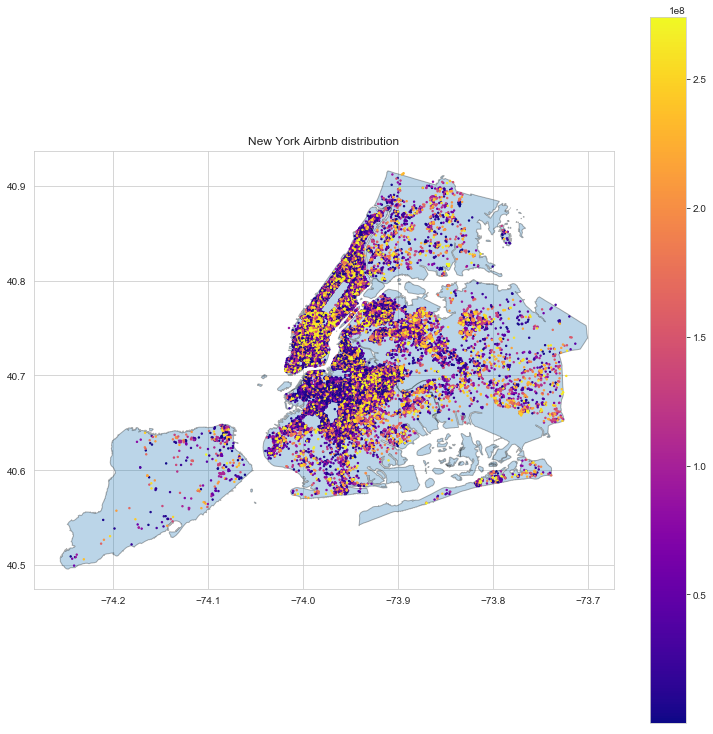

In [51]:

#how to interpret the coordinates.
crs = {'init' :'epsg:4326'} 
# different coordinate reference systems (CRS)-  A CRS tells Python how those coordinates related to places on the Earth.
# points_from_xy() for [Point(x, y) for x, y in zip(df.Longitude, df.Latitude)])
# geopandas.points_from_xy(Airbnb.longitude, Airbnb.latitude)
# if you convert a spreadsheet of latitudes and longitudes into a GeoSeries by hand, 
# you would set the projection by assigning the WGS84 latitude-longitude CRS 


Airbnb['geometry'] = Airbnb.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
gdf = gpd.GeoDataFrame(Airbnb, crs=crs, geometry=Airbnb['geometry'])

# load example data
df = gpd.read_file(gpd.datasets.get_path('nybb'))
df = df.to_crs(epsg=4326)

fig,ax = plt.subplots(figsize=(13,13))
ax.set_title("New York Airbnb distribution")
df.plot(ax=ax,alpha=0.3,edgecolor='black')
gdf.plot(column='host_id',ax=ax,legend=True,cmap='plasma',markersize=2)


In [52]:
Limit_500_2 = Airbnb.loc[Airbnb.price<500,['neighbourhood_group','price','longitude','latitude']]
Limit_500_2.price.describe()

count    47660.000000
mean       130.053903
std         85.087684
min          0.000000
25%         68.000000
50%        100.000000
75%        170.000000
max        499.000000
Name: price, dtype: float64

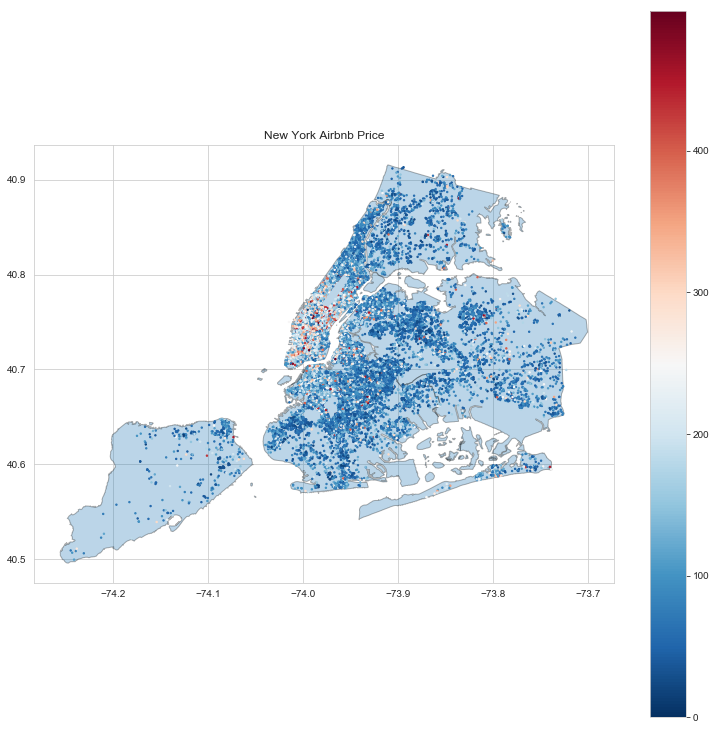

In [53]:
#how to interpret the coordinates.

crs = {'init' :'epsg:4326'}

Limit_500_2['geometry'] = Limit_500_2.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
gdf = gpd.GeoDataFrame(Limit_500_2, crs=crs, geometry=Limit_500_2['geometry'])

fig,ax = plt.subplots(figsize=(13,13))
ax.set_title("New York Airbnb Price")
ny = df.plot(ax=ax,alpha=0.3,edgecolor='black')
gdf_ny= gdf.plot(column='price',ax=ax,legend=True,cmap="RdBu_r",markersize=2)


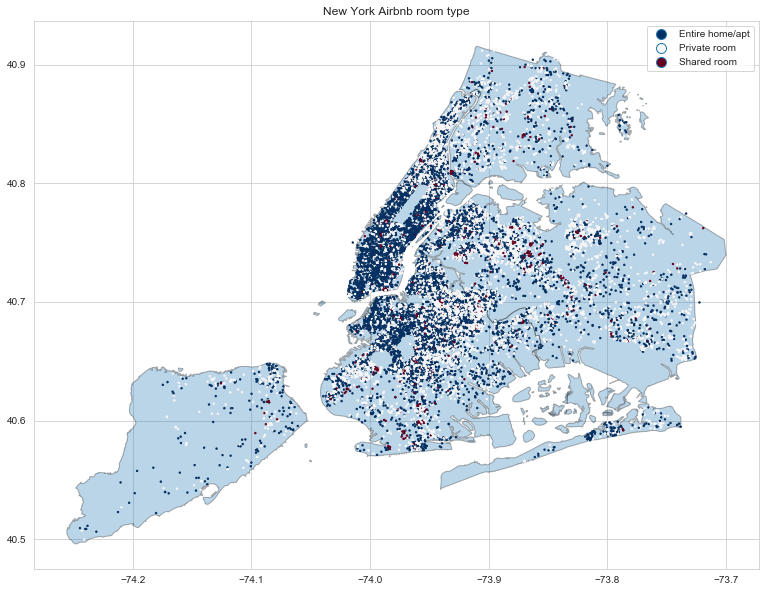

In [54]:
#how to interpret the coordinates.
crs = {'init' :'epsg:4326'}
Airbnb['geometry'] = Airbnb.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
gdf = gpd.GeoDataFrame(Airbnb, crs=crs, geometry=Airbnb['geometry'])

# load example data
df = gpd.read_file(gpd.datasets.get_path('nybb'))
df = df.to_crs(epsg=4326)

fig,ax = plt.subplots(figsize=(13,13))
ax.set_title("New York Airbnb room type")
df.plot(ax=ax,alpha=0.3,edgecolor='black')
gdf.plot(column='room_type',ax=ax,legend=True,cmap="RdBu_r",markersize=2)

## Minimum nights

<Figure size 720x720 with 0 Axes>

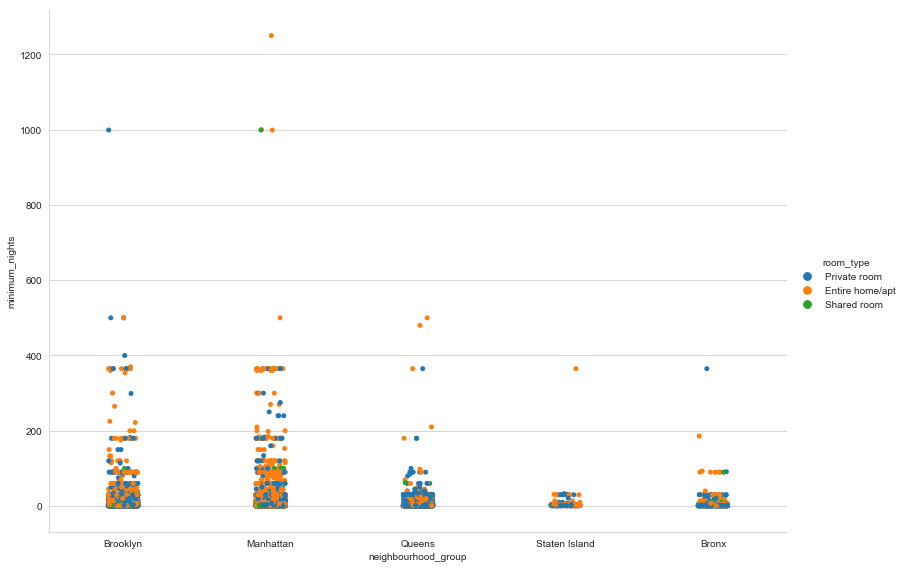

In [55]:
plt.figure(figsize=(10,10))
g = sns.catplot(x="neighbourhood_group", y='minimum_nights', hue="room_type",
                 data=Airbnb,height=8, aspect=1.4)

## Aibnb posting name 

In [56]:
from wordcloud import WordCloud, STOPWORDS 

In [57]:
Airbnb['name'].describe()

count              48879
unique             47905
top       Hillside Hotel
freq                  18
Name: name, dtype: object

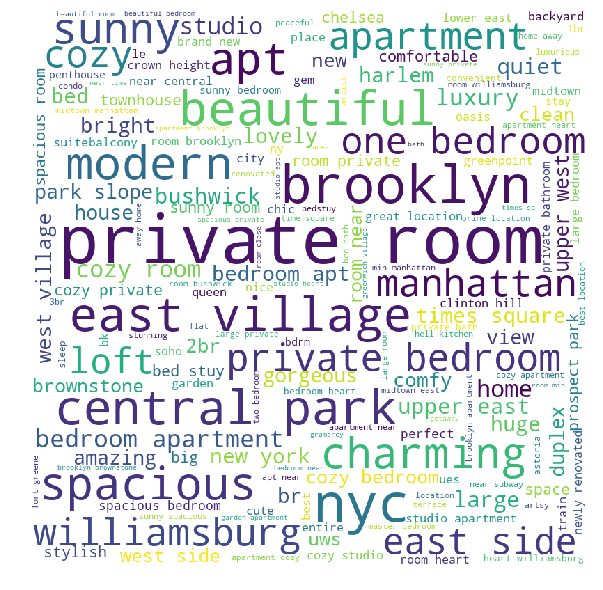

In [58]:
comment_words = ' '
stopwords = set(STOPWORDS) # The words that will be eliminated

'''Advantages of Word Clouds :
Analyzing customer and employee feedback.
Identifying new SEO keywords to target.'''
  
# iterate through the csv file 
for val in Airbnb['name']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

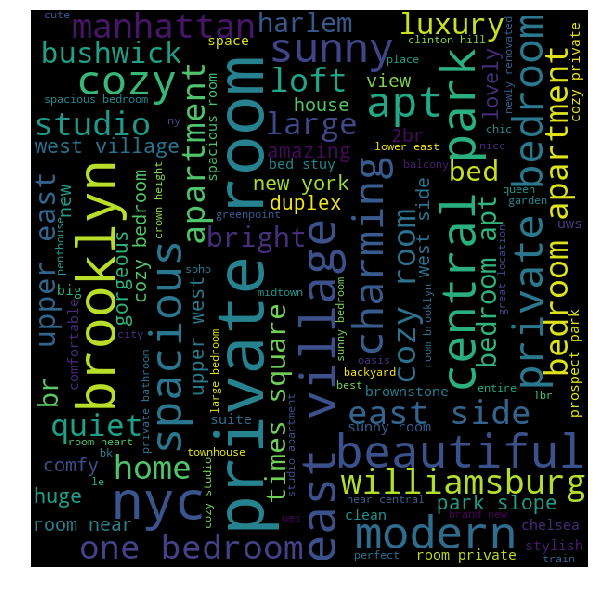

In [60]:
comment_words = ' '
stopwords = set(STOPWORDS) # The words that will be eliminated

# iterate through the csv file 
for val in Limit_500['name']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Linear regression 

Encoding 

In [62]:
group_dummies = Airbnb['neighbourhood_group'].str.get_dummies()
Airbnb = Airbnb.join(group_dummies)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,geometry
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,...,365,0,1,0,0,1,0,0,0,POINT (-73.97237 40.64749)
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,...,355,1,0,0,0,0,1,0,0,POINT (-73.98376999999999 40.75362)
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,...,365,0,1,0,0,0,1,0,0,POINT (-73.9419 40.80902)
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,...,194,1,0,0,0,1,0,0,0,POINT (-73.95976 40.68514)
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,...,0,1,0,0,0,0,1,0,0,POINT (-73.94399 40.79851)
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,...,129,1,0,0,0,0,1,0,0,POINT (-73.97499999999999 40.74767)
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,...,0,0,1,0,0,1,0,0,0,POINT (-73.95596 40.68688)
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,...,220,0,1,0,0,0,1,0,0,POINT (-73.98493000000001 40.76489)
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,...,0,0,1,0,0,0,1,0,0,POINT (-73.96723 40.80178)
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,...,188,1,0,0,0,0,1,0,0,POINT (-73.99037 40.71344000000001)


In [ ]:
room_dummies = Airbnb['room_type'].str.get_dummies()
Airbnb = Airbnb.join(room_dummies)

In [63]:
Airbnb.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Entire home/apt',
       'Private room', 'Shared room', 'Bronx', 'Brooklyn', 'Manhattan',
       'Queens', 'Staten Island', 'geometry'],
      dtype='object')

In [64]:
Airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,geometry
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,...,365,0,1,0,0,1,0,0,0,POINT (-73.97237 40.64749)
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,...,355,1,0,0,0,0,1,0,0,POINT (-73.98376999999999 40.75362)
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,...,365,0,1,0,0,0,1,0,0,POINT (-73.9419 40.80902)
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,...,194,1,0,0,0,1,0,0,0,POINT (-73.95976 40.68514)
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,...,0,1,0,0,0,0,1,0,0,POINT (-73.94399 40.79851)


Scaling 

In [65]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# To scale data 
scaler.fit(Airbnb[['number_of_reviews','calculated_host_listings_count', 'availability_365']]) 

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
X= Airbnb[[ 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'Entire home/apt', 'Private room', 'Shared room']]
y = Airbnb['price']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 
# test_size = percentage of dataset 

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lm = LinearRegression()

In [71]:
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
lm.coef_

array([ 1.17571445e-01, -6.96335472e-02,  1.63419271e-01, -2.84867875e+01,
        5.85742048e+00,  5.99429633e+01, -1.30046267e+01, -2.43089695e+01,
        8.39836501e+01, -2.70146829e+01, -5.69689672e+01])

In [73]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
minimum_nights,0.117571
calculated_host_listings_count,-0.069634
availability_365,0.163419
Bronx,-28.486788
Brooklyn,5.857420
Manhattan,59.942963
Queens,-13.004627
Staten Island,-24.308969
Entire home/apt,83.983650
Private room,-27.014683


Interpreting the coefficients:
​
- Holding all other features fixed, a 1 unit increase in **Bronx** is associated with an **decrease of 28.48 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Brooklyn** is associated with an **increase of 5.85 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Manhattan** is associated with an **increase of 60 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Queens** is associated with an **decrease of 13 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Staten Island** is associated with an **decrease of 24.3 total dollars spent**.

Interpreting the coefficients:
​
- Holding all other features fixed, a 1 unit increase in **Entire home/apt** is associated with an **increase of 84 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Private room** is associated with an **decrease of 27 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Shared room** is associated with an **decrease of 60 total dollars spent**.

In [74]:
pred = lm.predict(X_test)

In [75]:
error= pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': pred.flatten()})
error.head(20) 

,Actual,Predicted
0,99,97.587042
1,40,57.617785
2,149,168.617842
3,80,116.045648
4,95,170.180311
5,800,222.677509
6,300,186.568086
7,250,222.350670
8,150,169.925196
9,48,66.514952


Text(0, 0.5, 'Predicted Y')

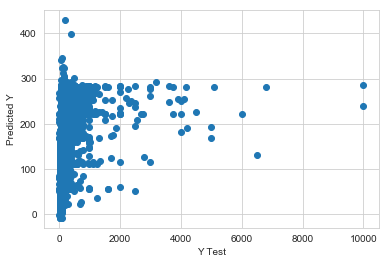

In [76]:
plt.scatter('Actual','Predicted',data=error)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. 

In [77]:
from sklearn import metrics 

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 73.80702874003786
MSE: 47990.738853233874
RMSE: 219.06788640335643


Residual 

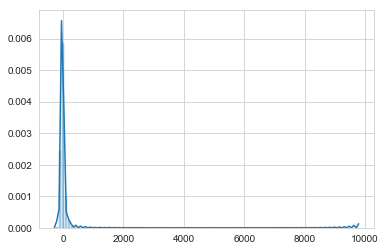

In [79]:
dif = (error['Actual']-error['Predicted'])
sns.distplot(dif,bins=100)

** make sure it looks normally distributed

## 2017 airbnb data

In [80]:
df = pd.read_csv("2017-07-12.csv")
df2 = pd.read_csv("2017-06-12.csv")
df3 = pd.read_csv("2017-05-06.csv")
df4 = pd.read_csv("2017-04-21.csv")
df5 = pd.read_csv("2017-03-14.csv")
df6 = pd.read_csv("2017-02-17.csv")
df7 = pd.read_csv("2017-01-15.csv")

In [81]:
Airbnb_2017 = pd.concat([df,df2,df3,df4,df5,df6,df7], ignore_index=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [82]:
Airbnb_2017.head()

,accommodates,bathrooms,bedrooms,borough,city,country,host_id,last_modified,latitude,location,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,4,NaN,1.0,Queens,New York,NaN,38614070,2017-07-15 21:30:31.858764,40.749909,0101000020E61000000EA14ACD1E7852C0F0FCA204FD5F...,...,NaN,"Room TO SHARE by DAY,week,month",Jackson Heights,5.0,85.0,House,6,7739955,Shared room,1438.0
1,6,NaN,1.0,Brooklyn,New York,NaN,32628813,2017-07-15 21:30:30.332828,40.678527,0101000020E6100000DFC2BAF1EE7852C0FC3905F9D956...,...,NaN,Spacious Room: Close to Manhattan,Cypress Hills,4.0,90.0,House,14,7383173,Shared room,1438.0
2,6,NaN,1.0,Brooklyn,New York,NaN,35553123,2017-07-15 21:30:23.607950,40.583041,0101000020E61000009696917A4F7D52C0139D6516A14A...,...,NaN,COZY COUCH,Sheepshead Bay,4.5,239.0,Apartment,3,10250852,Shared room,1438.0
3,2,NaN,1.0,Manhattan,New York,NaN,5029659,2017-07-15 21:30:21.832749,40.758374,0101000020E6100000A306D3307C7F52C0801134661261...,...,NaN,1 Bdrm Apt 1 Block from Times Sq.,Hell's Kitchen,5.0,165.0,Apartment,35,2188359,Shared room,1438.0
4,2,NaN,1.0,Manhattan,New York,NaN,70038324,2017-07-15 21:30:19.986579,40.761960,0101000020E610000016F9F5436C7D52C01A6EC0E78761...,...,NaN,NYC Upper East / Midtown East Luxury 1BR,Upper East Side,0.0,159.0,Apartment,0,19661354,Shared room,1438.0


In [83]:
Airbnb_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276085 entries, 0 to 276084
Data columns (total 21 columns):
accommodates            276085 non-null int64
bathrooms               0 non-null float64
bedrooms                276085 non-null float64
borough                 276085 non-null object
city                    160890 non-null object
country                 0 non-null float64
host_id                 276085 non-null int64
last_modified           276085 non-null object
latitude                276085 non-null float64
location                160890 non-null object
longitude               276085 non-null float64
minstay                 0 non-null float64
name                    160808 non-null object
neighborhood            276085 non-null object
overall_satisfaction    259188 non-null float64
price                   276085 non-null float64
property_type           160890 non-null object
reviews                 276085 non-null int64
room_id                 276085 non-null int64
room_ty

In [84]:
Airbnb_2017.describe()

,accommodates,bathrooms,bedrooms,country,host_id,latitude,longitude,minstay,overall_satisfaction,price,reviews,room_id,survey_id
count,276085.000000,0.0,276085.000000,0.0,2.760850e+05,276085.000000,276085.000000,0.0,259188.000000,276085.000000,276085.000000,2.760850e+05,160890.000000
mean,2.828875,NaN,1.153717,NaN,3.134568e+07,40.731125,-73.955238,NaN,2.889661,138.821924,16.448500,1.007512e+07,1271.186457
std,1.839031,NaN,0.713540,NaN,3.331430e+07,0.054531,0.041879,NaN,2.298590,175.120127,30.109997,5.628927e+06,118.712076
min,1.000000,NaN,0.000000,NaN,4.300000e+01,40.499794,-74.240843,NaN,0.000000,0.000000,0.000000,2.515000e+03,1129.000000
25%,2.000000,NaN,1.000000,NaN,5.029659e+06,40.691579,-73.983698,NaN,0.000000,65.000000,1.000000,5.162093e+06,1196.000000
50%,2.000000,NaN,1.000000,NaN,1.883848e+07,40.724781,-73.956969,NaN,4.500000,100.000000,4.000000,1.018740e+07,1196.000000
75%,4.000000,NaN,1.000000,NaN,4.771531e+07,40.765551,-73.939646,NaN,5.000000,160.000000,18.000000,1.512390e+07,1438.000000
max,16.000000,NaN,50.000000,NaN,1.405179e+08,40.911003,-73.702257,NaN,5.000000,10000.000000,454.000000,1.987405e+07,1438.000000


In [85]:
Airbnb_2017.shape

(276085, 21)

In [86]:
Airbnb_2017['host_id'].nunique()

48230

Duplicate host posted in this dataset. 

## Null value 

In [87]:
Airbnb_2017.isnull().sum()

accommodates                 0
bathrooms               276085
bedrooms                     0
borough                      0
city                    115195
country                 276085
host_id                      0
last_modified                0
latitude                     0
location                115195
longitude                    0
minstay                 276085
name                    115277
neighborhood                 0
overall_satisfaction     16897
price                        0
property_type           115195
reviews                      0
room_id                      0
room_type                    0
survey_id               115195
dtype: int64

In [88]:
Airbnb_2017= Airbnb_2017.drop(['bathrooms','name','city','country','minstay','survey_id','room_id','location'],axis=1)

In [89]:
Airbnb_2017[Airbnb_2017['property_type'].isnull()]


,accommodates,bedrooms,borough,host_id,last_modified,latitude,longitude,neighborhood,overall_satisfaction,price,property_type,reviews,room_type
160890,3,1.0,Manhattan,48179293,2017-03-15 22:11:31.742583,40.765430,-73.954690,Upper East Side,5.0,129.0,NaN,11,Shared room
160891,5,1.0,Brooklyn,12720552,2017-03-15 22:11:31.739572,40.699019,-73.931017,Bushwick,4.5,140.0,NaN,3,Shared room
160892,2,1.0,Manhattan,6046616,2017-03-15 22:11:14.158631,40.836954,-73.941243,Washington Heights,0.0,375.0,NaN,0,Shared room
160893,2,1.0,Manhattan,102856303,2017-03-15 22:11:12.680221,40.768278,-73.957210,Upper East Side,0.0,230.0,NaN,1,Shared room
160894,2,1.0,Brooklyn,38108547,2017-03-15 22:11:11.179484,40.690880,-73.906183,Bushwick,0.0,200.0,NaN,1,Shared room
160895,2,1.0,Manhattan,20571398,2017-03-15 22:11:09.800352,40.771799,-73.948645,Upper East Side,0.0,150.0,NaN,0,Shared room
160896,4,1.0,Manhattan,4887492,2017-03-15 22:11:09.788305,40.710080,-74.009573,Financial District,5.0,158.0,NaN,23,Shared room
160897,2,1.0,Manhattan,11176840,2017-03-15 22:11:09.780658,40.721875,-73.996473,Nolita,5.0,145.0,NaN,3,Shared room
160898,4,1.0,Brooklyn,24729636,2017-03-15 22:11:09.774435,40.715239,-73.950155,Williamsburg,5.0,150.0,NaN,3,Shared room
160899,3,1.0,Brooklyn,3626529,2017-03-15 22:11:08.189210,40.682899,-73.972046,Fort Greene,5.0,140.0,NaN,4,Shared room


In [90]:
Airbnb_2017.isnull().sum()

accommodates                 0
bedrooms                     0
borough                      0
host_id                      0
last_modified                0
latitude                     0
longitude                    0
neighborhood                 0
overall_satisfaction     16897
price                        0
property_type           115195
reviews                      0
room_type                    0
dtype: int64

## Correlation 

In [91]:
city_dummies = Airbnb_2017['borough'].str.get_dummies()
Airbnb_2017 = Airbnb_2017.join(city_dummies)

In [92]:
room_dummies = Airbnb_2017['room_type'].str.get_dummies()
Airbnb_2017 = Airbnb_2017.join(room_dummies)

In [93]:
Airbnb_2017.columns

Index(['accommodates', 'bedrooms', 'borough', 'host_id', 'last_modified',
       'latitude', 'longitude', 'neighborhood', 'overall_satisfaction',
       'price', 'property_type', 'reviews', 'room_type', 'Bronx', 'Brooklyn',
       'Manhattan', 'Queens', 'Staten Island', 'Entire home/apt',
       'Private room', 'Shared room'],
      dtype='object')

In [94]:
corr = Airbnb_2017[['accommodates', 'bedrooms', 'borough'
          , 'neighborhood', 'overall_satisfaction',
       'price', 'reviews', 'Bronx', 'Brooklyn',
       'Manhattan', 'Queens', 'Staten Island', 'Entire home/apt',
       'Private room', 'Shared room']].corr()
corr

,accommodates,bedrooms,overall_satisfaction,price,reviews,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
accommodates,1.000000,0.639665,0.113564,0.430956,0.102703,-0.012919,0.007312,-0.000300,-0.012022,0.022757,0.488432,-0.458920,-0.090604
bedrooms,0.639665,1.000000,0.017051,0.335043,0.023311,-0.005991,0.072500,-0.075821,0.003759,0.023334,0.185672,-0.173734,-0.036616
overall_satisfaction,0.113564,0.017051,1.000000,-0.016153,0.425331,0.002385,-0.008048,0.009134,-0.004584,0.005835,0.081643,-0.077724,-0.012188
price,0.430956,0.335043,-0.016153,1.000000,-0.020312,-0.045128,-0.110869,0.177726,-0.091692,-0.011628,0.347058,-0.323318,-0.072755
reviews,0.102703,0.023311,0.425331,-0.020312,1.000000,-0.005935,-0.014450,0.011291,0.005792,0.006003,0.020340,-0.013170,-0.021739
Bronx,-0.012919,-0.005991,0.002385,-0.045128,-0.005935,1.000000,-0.107482,-0.122290,-0.043372,-0.010454,-0.052562,0.048213,0.013299
Brooklyn,0.007312,0.072500,-0.008048,-0.110869,-0.014450,-0.107482,1.000000,-0.779524,-0.276472,-0.066640,-0.052751,0.062363,-0.028915
Manhattan,-0.000300,-0.075821,0.009134,0.177726,0.011291,-0.122290,-0.779524,1.000000,-0.314563,-0.075821,0.123139,-0.124608,0.004098
Queens,-0.012022,0.003759,-0.004584,-0.091692,0.005792,-0.043372,-0.276472,-0.314563,1.000000,-0.026891,-0.092980,0.080615,0.037647
Staten Island,0.022757,0.023334,0.005835,-0.011628,0.006003,-0.010454,-0.066640,-0.075821,-0.026891,1.000000,-0.011204,0.014743,-0.010669


Text(0.5, 1.0, 'Airbnb_2017.corr()')

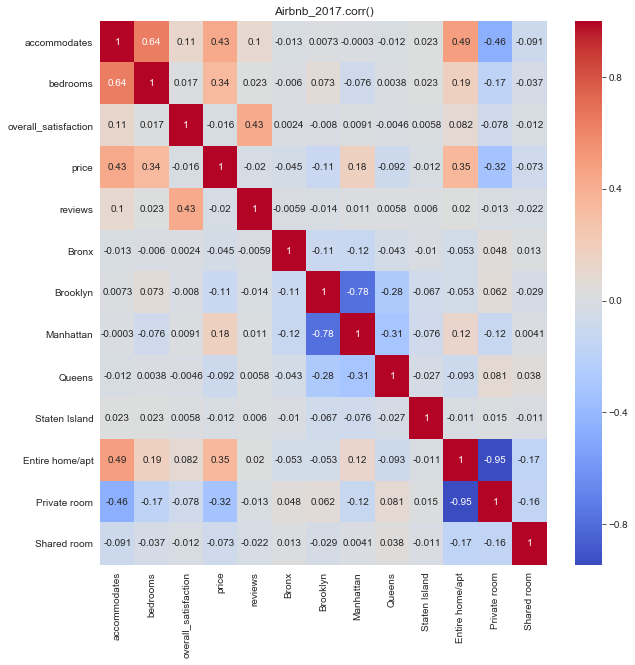

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.title('Airbnb_2017.corr()')

<p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold"><br>
3. Data exploration </p><br>

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


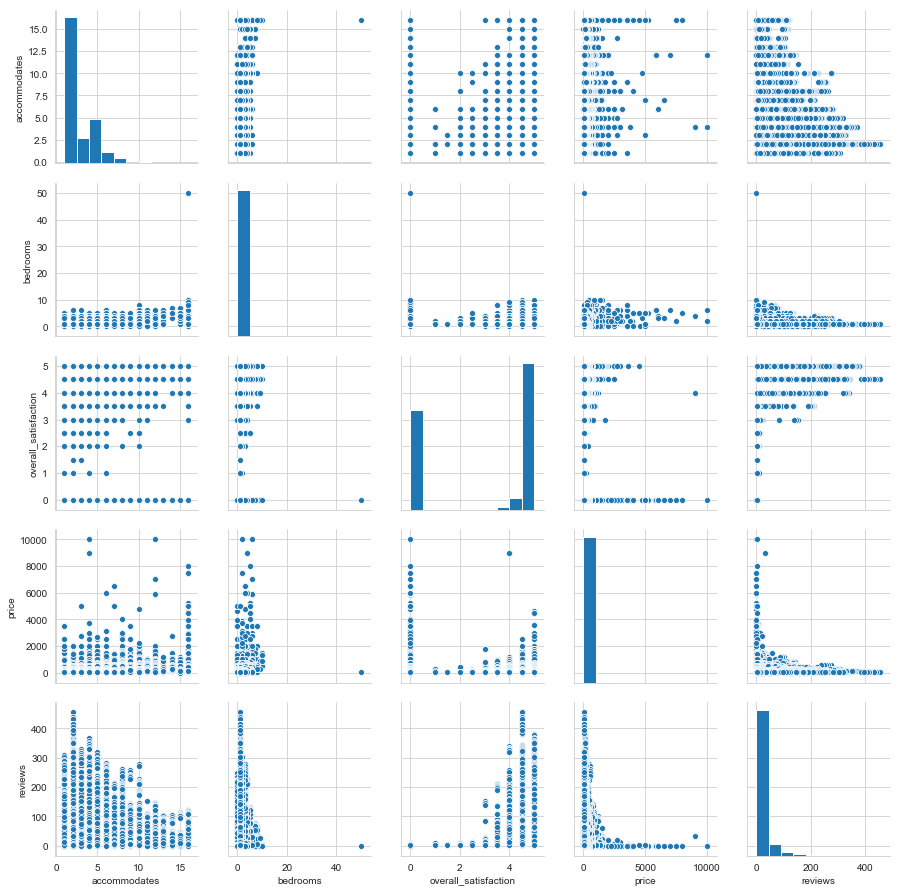

In [96]:
sns.pairplot(Airbnb_2017[['accommodates','bedrooms','overall_satisfaction','price','reviews']],
              palette='coolwarm')

## Overall satisfaction

Text(0.5, 1.0, 'Overall_satisfaction in 2017')

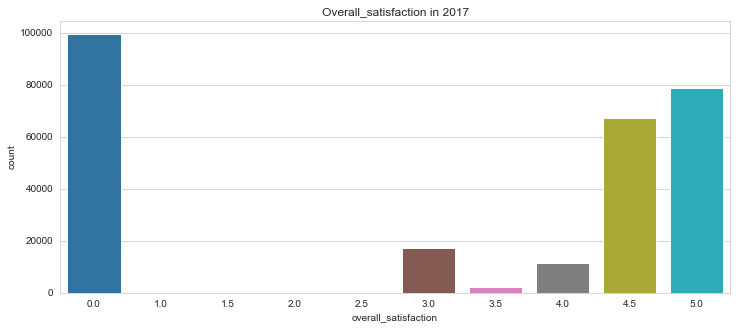

In [97]:
mean = round(Airbnb_2017['overall_satisfaction'].mean())
Airbnb_2017['overall_satisfaction'].replace(np.nan,mean,inplace=True)
plt.figure(figsize=(12,5))
sns.countplot(Airbnb_2017['overall_satisfaction'])
plt.title("Overall_satisfaction in 2017")

Text(0.5, 1.0, 'Overall satisfaction in each room type')

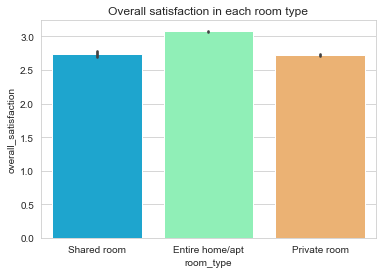

In [98]:
sns.barplot(x='room_type',y='overall_satisfaction',data=Airbnb_2017,palette='rainbow')
plt.title("Overall satisfaction in each room type")

In [100]:
Airbnb_2017['overall_satisfaction'].value_counts()

0.0    99498
5.0    78529
4.5    67073
3.0    17357
4.0    11332
3.5     2117
2.5       99
2.0       40
1.0       26
1.5       14
Name: overall_satisfaction, dtype: int64

In [101]:
Airbnb_2017['overall_satisfaction'] = pd.Categorical(Airbnb_2017.overall_satisfaction)
Airbnb_2017['overall_satisfaction'].dtype

CategoricalDtype(categories=[0.0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], ordered=False)

Text(0.5, 1.0, 'Price range in different satisfaction levels')

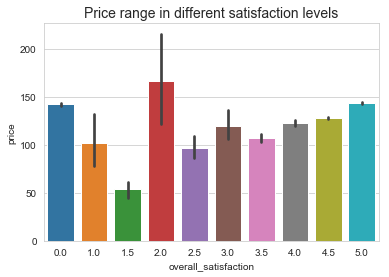

In [161]:
sns.barplot(x='overall_satisfaction',y='price',data=Airbnb_2017)
plt.title("Price range in different satisfaction levels",fontsize=14)

- Price is not related to how good or bad the client think of the Airbnb houses.

Text(0.5, 1.0, 'Reviews range in different satisfaction levels')

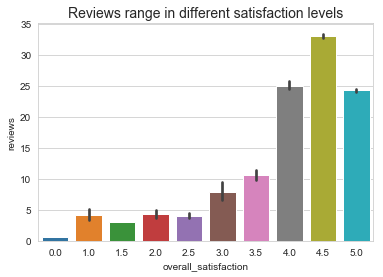

In [160]:
sns.barplot(x='overall_satisfaction',y='reviews',data=Airbnb_2017)
plt.title("Reviews range in different satisfaction levels",fontsize=14)

- Stronger relationship between overall_satisfaction and reviews. 
The more they get reviews, the higher their overall_satisfaction. Guests who get a good feeling about the airbnb room tend to write reviews. 

## Which area has a good satisfaction level?

In [130]:
Airbnb_2017 = pd.concat([df,df2,df3,df4,df5,df6,df7], ignore_index=True)
total = Airbnb_2017.groupby('borough')['host_id'].describe()['count'].to_frame()
total

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,count
borough,
Bronx,4016.0
Brooklyn,100140.0
Manhattan,116284.0
Queens,24400.0
Staten Island,1558.0


In [146]:
mean_host=Airbnb_2017[['host_id','borough','overall_satisfaction']].groupby(['borough','host_id']).mean()
mean_host.reset_index(inplace=True)
df2 =mean_host.groupby('borough').apply(lambda x: x.sort_values(["overall_satisfaction"], ascending = False)).reset_index(drop=True)
df2 = df2[df2['overall_satisfaction']==5]
overall_5 = df2.groupby('borough')['host_id'].describe()['count'].to_frame()
df3 = pd.concat([total,overall_5],axis=1)
df3.columns = ['total','overall_5']
df3['rate'] = df3['overall_5']/df3['total']
df3.reset_index(inplace=True)
df3

,borough,total,overall_5,rate
0,Bronx,4016.0,124.0,0.030876
1,Brooklyn,100140.0,3798.0,0.037927
2,Manhattan,116284.0,4716.0,0.040556
3,Queens,24400.0,791.0,0.032418
4,Staten Island,1558.0,51.0,0.032734


Text(0.5, 1.0, 'Rate of 5 overall satisfaction')

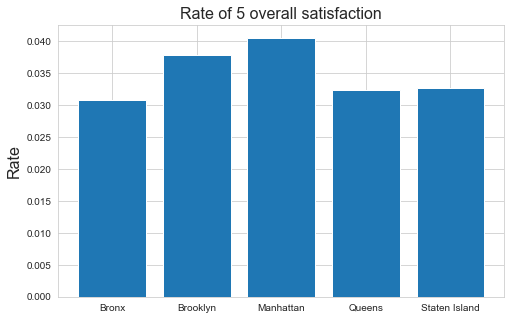

In [157]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(df3['borough'],df3['rate'])
plt.ylabel('Rate', fontsize=16)
plt.title('Rate of 5 overall satisfaction',fontsize=16)


- Airbnb houses in the more popular cities, such as Manhattan and Brooklyn, have got the higher satisfaction levels. There are 4716 and 3798 guests which have given the 5 satisfaction level to Airbnb host in Manhattan and Brooklyn.  

Text(0.5, 1.0, 'Overall satisfaction in each area')

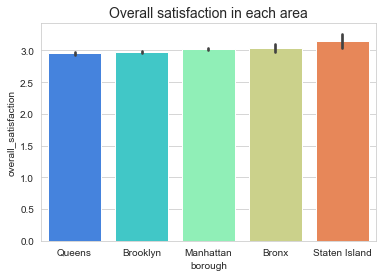

In [163]:
sns.barplot(x='borough',y='overall_satisfaction',data=Airbnb_2017,palette='rainbow')
plt.title("Overall satisfaction in each area",fontsize=14)

- Above this chart, We can see Airbnb houses in Staten Island have got the higher satisfaction level. However, the average of satisfaction level is slightly different. There is no great difference in satisfaction level. 

## Which host has the higher satisfaction level? 

In [165]:
Airbnb_2017.head()

,accommodates,bathrooms,bedrooms,borough,city,country,host_id,last_modified,latitude,location,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,4.0,NaN,1.0,Queens,New York,NaN,38614070,2017-07-15 21:30:31.858764,40.749909,0101000020E61000000EA14ACD1E7852C0F0FCA204FD5F...,...,NaN,"Room TO SHARE by DAY,week,month",Jackson Heights,5.0,85.0,House,6.0,7739955.0,Shared room,1438.0
1,6.0,NaN,1.0,Brooklyn,New York,NaN,32628813,2017-07-15 21:30:30.332828,40.678527,0101000020E6100000DFC2BAF1EE7852C0FC3905F9D956...,...,NaN,Spacious Room: Close to Manhattan,Cypress Hills,4.0,90.0,House,14.0,7383173.0,Shared room,1438.0
2,6.0,NaN,1.0,Brooklyn,New York,NaN,35553123,2017-07-15 21:30:23.607950,40.583041,0101000020E61000009696917A4F7D52C0139D6516A14A...,...,NaN,COZY COUCH,Sheepshead Bay,4.5,239.0,Apartment,3.0,10250852.0,Shared room,1438.0
3,2.0,NaN,1.0,Manhattan,New York,NaN,5029659,2017-07-15 21:30:21.832749,40.758374,0101000020E6100000A306D3307C7F52C0801134661261...,...,NaN,1 Bdrm Apt 1 Block from Times Sq.,Hell's Kitchen,5.0,165.0,Apartment,35.0,2188359.0,Shared room,1438.0
4,2.0,NaN,1.0,Manhattan,New York,NaN,70038324,2017-07-15 21:30:19.986579,40.761960,0101000020E610000016F9F5436C7D52C01A6EC0E78761...,...,NaN,NYC Upper East / Midtown East Luxury 1BR,Upper East Side,0.0,159.0,Apartment,0.0,19661354.0,Shared room,1438.0


In [169]:
mean_host=Airbnb_2017[['host_id','borough','overall_satisfaction']].groupby(['borough','host_id']).mean()
mean_host.reset_index(inplace=True)
df2 =mean_host.groupby('borough').apply(lambda x: x.sort_values(["overall_satisfaction"], ascending = False)).reset_index(drop=True)



In [167]:
df2

,borough,host_id,overall_satisfaction
0,Bronx,3654097,5.0
1,Bronx,11341773,5.0
2,Bronx,11342593,5.0
3,Bronx,58634833,5.0
4,Bronx,21096298,5.0
5,Bronx,121205626,5.0
6,Bronx,5944946,5.0
7,Bronx,5905887,5.0
8,Bronx,41816848,5.0
9,Bronx,5682956,5.0
